In [21]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [57]:
#df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
#df.replace("null", np.nan, inplace=True) #Replacing 0 with NaN
#df.fillna( method ='ffill', inplace = True) #Filling with data from next day
df = pd.read_csv('NAS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [58]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN

In [59]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date']=df['Date'].map(dt.datetime.toordinal)

In [60]:
#input = df.drop('Date',axis = 'columns')
#input = df.drop('Open',axis = 'columns')
#input = df.drop('High',axis = 'columns')
#input = df.drop('Low',axis = 'columns')

In [61]:
df = df.reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [62]:
#input = pd.to_datetime(df.Date, format='%Y-%m-%d') #dt.strptime(df.Date, '%Y-%m-%d')
#input.head(10)
#date_float = df['Date'].astype(float)

temp_date = pd.to_datetime(df.Date, format='%Y-%m-%d') #dt.strptime(df.Date, '%Y-%m-%d')
temp_date_delta = temp_date - temp_date.min()
temp_date_reshape = np.reshape([temp_date_delta],(-1,1))
input = temp_date_reshape
input

array([[                 0],
       [    86400000000000],
       [   345600000000000],
       ...,
       [530928000000000000],
       [531014400000000000],
       [531100800000000000]], dtype='timedelta64[ns]')

In [63]:
stock_on_close = df.Close
stock_on_close

0       19.139799
1       18.454201
2       18.054300
3       17.425800
4       17.254400
          ...    
4199     0.676800
4200     0.600600
4201     0.626000
4202     0.605000
4203     0.610600
Name: Close, Length: 4204, dtype: float64

In [64]:
regObj = linear_model.LinearRegression()
regObj.fit(input, stock_on_close)

LinearRegression()

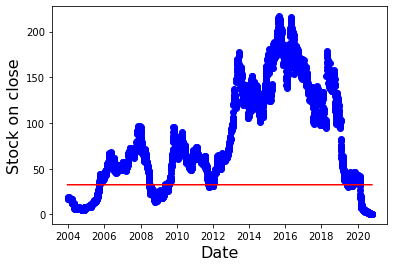

In [65]:
temp_date_float = temp_date_reshape / pd.to_timedelta(1, unit='D')

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Stock on close', fontsize = 16)

plt.scatter(temp_date, df.Close, color = 'blue')
plt.plot(temp_date, regObj.predict(temp_date_float), color = 'red')
#plt.plot(stock_on_close, regObj.predict(input), color = 'red', casting = unsafe)

In [66]:
regObj.predict([[2021-8-12]])

array([32.50191818])

In [67]:
coefficient=regObj.coef_
coefficient

array([1.77519811e-16])

In [68]:
intercept=regObj.intercept_
intercept

32.501918183535395

In [69]:
coefficient*(2021-8-12)+intercept

array([32.50191818])

In [121]:
x = temp_date_float
y = df.Close

In [122]:
logmodel = linear_model.LinearRegression()

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [124]:
logmodel.fit(x_train, y_train)

LinearRegression()

In [125]:
from sklearn import metrics
logmodel.score(x_test, y_test)

0.2240530869499473